In [168]:
import torch
import numpy as np

import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [169]:
from ninpy.datasets.camvid import Camvid
COLOR_MAP = Camvid.COLOR_MAP



In [170]:
cls_masks = np.full((mask.shape[0], mask.shape[1]), 11)
mask_pth = os.path.expanduser("~/datasets/camvid/labels/0001TP_006840_L.png")
mask = cv2.imread(mask_pth, cv2.IMREAD_COLOR)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

for i in range(len(COLOR_MAP)):
        if i in [1, 2, 3, 4, 5, 6, 8, 9, 10]:
            for j in range(len(COLOR_MAP[i])):
                #print(COLOR_MAP[i][j])
                cls_mask = cv2.inRange(mask, COLOR_MAP[i][j], COLOR_MAP[i][j])/255.0
                cls_masks[cls_mask.astype(bool)] = i
        else:
            cls_mask = cv2.inRange(mask, COLOR_MAP[i], COLOR_MAP[i])/255.0
            cls_masks[cls_mask.astype(bool)] = i

            #print(COLOR_MAP[i])

        #plt.imshow(cls_mask)
        #plt.show()
        #cls_masks[cls_mask.astype(bool)] = i

cls_masks = cls_masks.astype(np.uint8)

In [171]:
URL = "https://raw.githubusercontent.com/alexgkendall/SegNet-Tutorial/master/CamVid/trainannot/"

list_train = ['0001TP_006720.png',
    '0001TP_006750.png',
    '0001TP_006780.png',
    '0001TP_006810.png',
    '0001TP_006840.png']

import requests
from io import BytesIO

segimg = requests.get(os.path.join(URL, list_train[-1]), stream=True)
segimg = np.array(Image.open(segimg.raw))

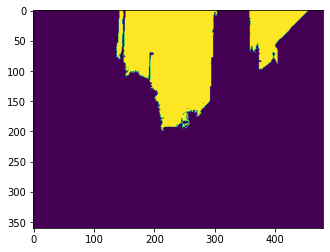

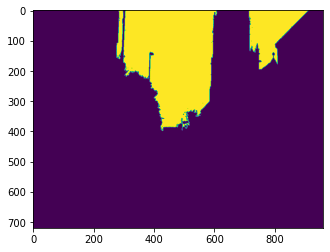

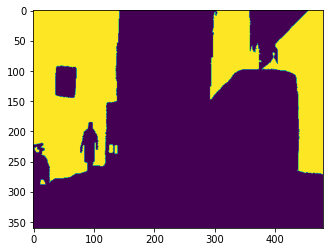

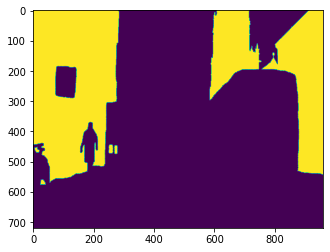

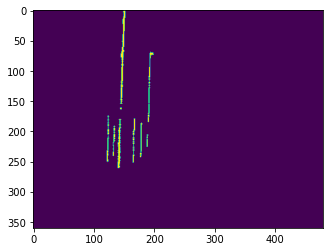

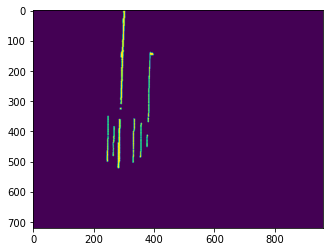

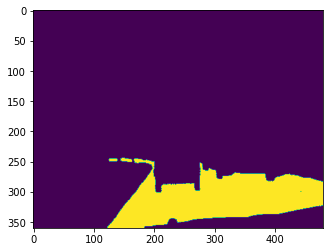

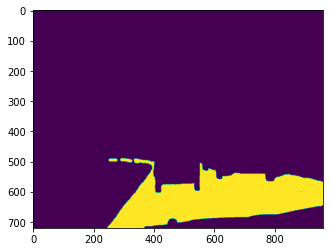

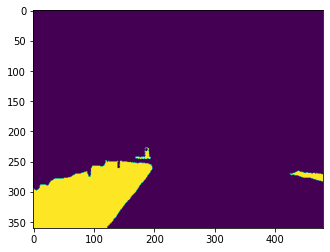

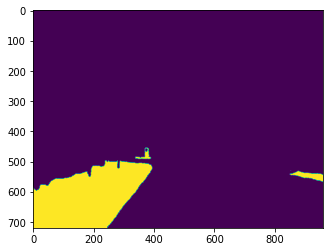

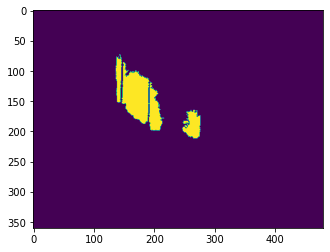

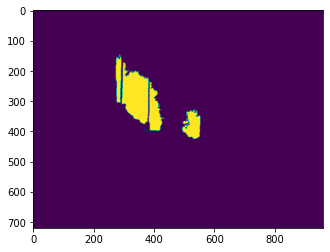

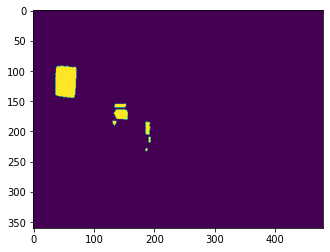

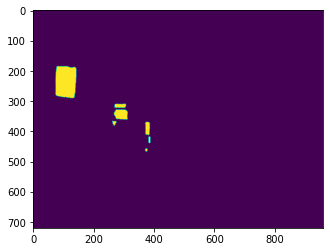

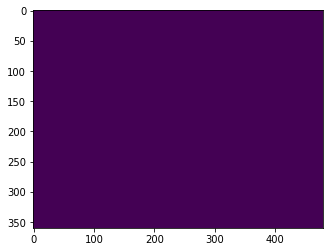

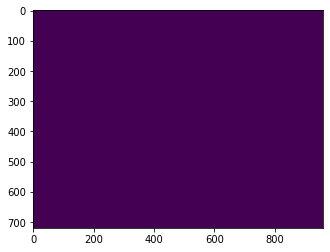

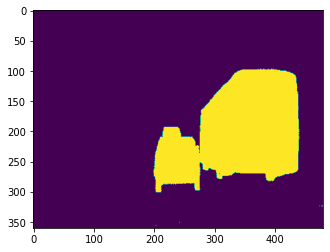

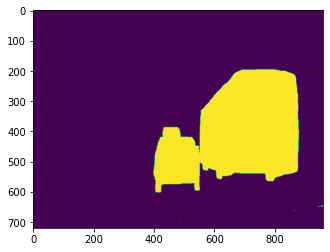

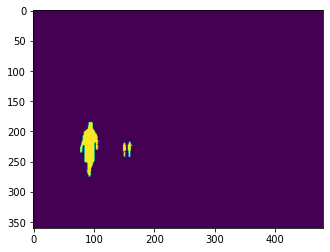

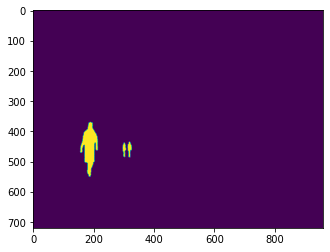

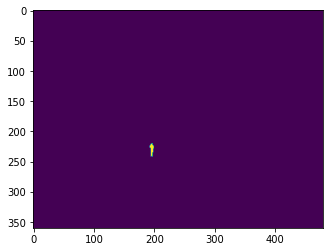

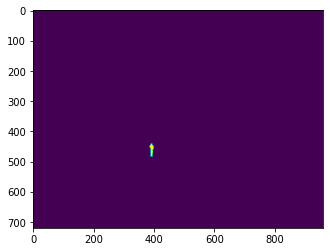

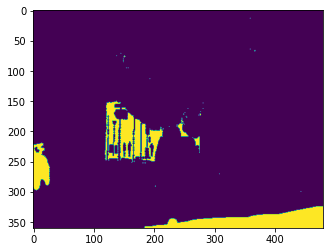

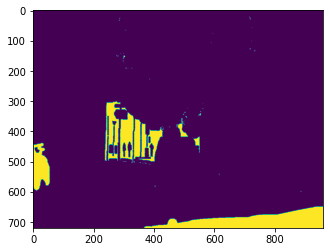

In [172]:
for i in range(12):
    plt.imshow(segimg == i)
    plt.show()
    plt.imshow(cls_masks == i)
    plt.show()
